In [55]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.common.by import By
from matplotlib import pyplot as plt
from matplotlib import image as mpimg
from selenium.webdriver.common.keys import Keys
from selenium.webdriver import ActionChains
import time
from bs4 import BeautifulSoup

In [58]:
driver = webdriver.Chrome(service=Service("../driver/chromedriver"))
driver.get("https://www.selenium.dev/")

In [11]:
driver.close()

In [13]:
driver = webdriver.Chrome(service=Service("../driver/chromedriver"))
driver.get("https://www.selenium.dev/")

In [66]:
driver.current_url

'https://www.selenium.dev/'

In [67]:
driver.execute_script("window.scrollTo(0, document.body.scrollHeight)")

In [68]:
driver.execute_script("window.scrollTo(0, document.body.scroll(0, 0))")

In [69]:
element = driver.find_element(By.CLASS_NAME, "d-flex.justify-content-center.p-5.td-box--100")
print(element.get_attribute('innerHTML'))

<h2 class="selenium">News</h2>


In [70]:
element = driver.find_element(By.CLASS_NAME, "d-flex.justify-content-center.p-5.td-box--100")
child = element.find_element(By.CLASS_NAME, "selenium")

print(child.text)

News


In [75]:
driver.execute_script("arguments[0].scrollIntoView(false);", child)

In [76]:
driver.save_screenshot("../data/image_01.png")

True

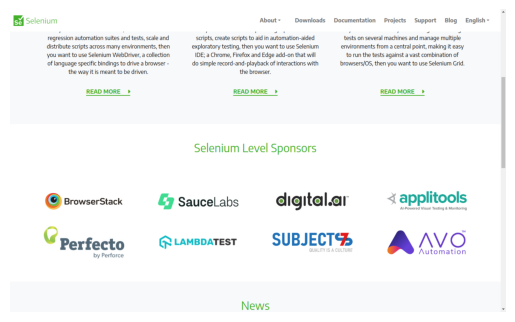

In [77]:
image = mpimg.imread("../data/image_01.png")
plt.imshow(image)
plt.axis('off')
plt.show()

In [78]:
doc_link = driver.find_element(By.XPATH, '''//*[@id="main_navbar"]/ul/li[3]/a''')
doc_link.click()

In [79]:
doc_link = driver.find_element(By.XPATH, '''//*[@id="docsearch-1"]/button''')
doc_link.click()

In [80]:
search_doc = driver.find_element(By.CSS_SELECTOR, "#docsearch-input")

In [81]:
search_doc = driver.find_element(By.CSS_SELECTOR, "#docsearch-input")
search_doc.send_keys('find elements')

In [82]:
search_doc.send_keys(Keys.ENTER)

In [83]:
python_tab = driver.find_element(By.ID, "tabs-09-02-tab")
driver.execute_script("arguments[0].scrollIntoView(false);", python_tab)

In [84]:
python_tab.click()

ElementClickInterceptedException: Message: element click intercepted: Element is not clickable at point (385, 919)
  (Session info: chrome=122.0.6261.69)
Stacktrace:
#0 0x5598708a4793 <unknown>
#1 0x5598705981c6 <unknown>
#2 0x5598705e9f93 <unknown>
#3 0x5598705e7ea5 <unknown>
#4 0x5598705e5877 <unknown>
#5 0x5598705e46e8 <unknown>
#6 0x5598705d8247 <unknown>
#7 0x5598706053d2 <unknown>
#8 0x5598705d7bd8 <unknown>
#9 0x55987060559e <unknown>
#10 0x559870623dd9 <unknown>
#11 0x559870605173 <unknown>
#12 0x5598705d62d3 <unknown>
#13 0x5598705d6c9e <unknown>
#14 0x5598708688cb <unknown>
#15 0x55987086c745 <unknown>
#16 0x5598708552e1 <unknown>
#17 0x55987086d2d2 <unknown>
#18 0x55987083917f <unknown>
#19 0x559870892dc8 <unknown>
#20 0x559870892fc3 <unknown>
#21 0x5598708a3944 <unknown>
#22 0x7f5d30894ac3 <unknown>


In [85]:
python_pannel = driver.find_element(By.ID, "tabs-09-02")
python_code = python_pannel.find_element(By.TAG_NAME, "code")

print(python_code.text)

In [86]:
driver.back()

In [87]:
menu = driver.find_element(By.ID, "main_navbar")
li_list = menu.find_elements(By.TAG_NAME, "li")
for idx, li in enumerate(li_list):
    print("[" + str(idx) + "] ===================================")
    print(li.get_attribute('innerHTML'))

[0] ===================================
<a class="nav-link dropdown-toggle" href="#" id="navbarDropdown" role="button" data-bs-toggle="dropdown" aria-haspopup="true" aria-expanded="false">About</a><div class="dropdown-menu" aria-labelledby="navbarDropdown"><a class="dropdown-item" href="/about">About Selenium</a>
<a class="dropdown-item" href="/project">Structure and Governance</a>
<a class="dropdown-item" href="/events">Events</a>
<a class="dropdown-item" href="/ecosystem">Ecosystem</a>
<a class="dropdown-item" href="/history">History</a>
<a class="dropdown-item" href="/getinvolved">Get Involved</a>
<a class="dropdown-item" href="/sponsors">Sponsors</a></div>
[1] ===================================
<a class="nav-link" href="/downloads"><span>Downloads</span></a>
[2] ===================================
<a class="nav-link" href="/documentation"><span>Documentation</span></a>
[3] ===================================
<a class="nav-link" href="/projects"><span>Projects</span></a>
[4] ======

In [88]:
about = li_list[0]
about.click()
link_list = about.find_elements(By.CLASS_NAME, "dropdown-item")
for link in link_list:
    print(link.text)

About Selenium
Structure and Governance
Events
Ecosystem
History
Get Involved
Sponsors


In [89]:
history = about.find_element(By.LINK_TEXT, "History")
print(history.text)

History


In [90]:
history.click()

In [91]:
driver.back()

In [92]:
actions = ActionChains(driver)
actions.click(about)
actions.click(history)
actions.perform()

In [93]:
driver.back()

about = li_list[0]
link_list = about.find_elements(By.CLASS_NAME, "dropdown-item")
for link in link_list:
    print(link.get_attribute("href"))

https://www.selenium.dev/about
https://www.selenium.dev/project
https://www.selenium.dev/events
https://www.selenium.dev/ecosystem
https://www.selenium.dev/history
https://www.selenium.dev/getinvolved
https://www.selenium.dev/sponsors


In [94]:
page = driver.page_source
soup = BeautifulSoup(page, "html.parser")
print(soup.prettify())

<html class="no-js" lang="en">
 <head>
  <meta charset="utf-8"/>
  <meta content="width=device-width,initial-scale=1,shrink-to-fit=no" name="viewport"/>
  <link href="/documentation/_print/" rel="alternate" type="text/html"/>
  <meta content="index, follow" name="robots"/>
  <link href="/favicons/favicon.ico" rel="shortcut icon"/>
  <link href="/favicons/apple-touch-icon-180x180.png" rel="apple-touch-icon" sizes="180x180"/>
  <link href="/favicons/favicon-16x16.png" rel="icon" sizes="16x16" type="image/png"/>
  <link href="/favicons/favicon-32x32.png" rel="icon" sizes="32x32" type="image/png"/>
  <link href="/favicons/android-36x36.png" rel="icon" sizes="36x36" type="image/png"/>
  <link href="/favicons/android-48x48.png" rel="icon" sizes="48x48" type="image/png"/>
  <link href="/favicons/android-72x72.png" rel="icon" sizes="72x72" type="image/png"/>
  <link href="/favicons/android-96x96.png" rel="icon" sizes="96x96" type="image/png"/>
  <link href="/favicons/android-144x144.png" rel="

In [95]:
driver.close()